In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%time data = pd.read_table('XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

CPU times: user 54.2 s, sys: 1.16 s, total: 55.4 s
Wall time: 57.7 s


Dividing the data into train and test 

In [4]:
train_data = data[data['issue_d'] < '2015-6-01']
test_data = data[data['issue_d'] >= '2015-6-01']

In [5]:
train = train_data.copy()
test = test_data.copy()

In [6]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
train['default_ind'].value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [8]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,5.989780e+05,5.989780e+05,598978.000000,598978.000000,598978.000000,598978.000000,598978.000000,5.989780e+05,598978.000000,598978.000000,...,0.0,0.0,0.0,0.0,0.0,5.316650e+05,0.0,0.0,0.0,598978.000000
mean,2.044157e+07,2.231985e+07,14540.642519,14521.789031,14478.973948,13.520911,434.562058,7.397280e+04,17.638408,0.297171,...,NaN,NaN,NaN,NaN,NaN,3.111062e+04,NaN,NaN,NaN,0.077058
std,1.619182e+07,1.711491e+07,8336.476483,8327.529212,8337.695086,4.370961,242.892709,5.676163e+04,8.070746,0.828659,...,NaN,NaN,NaN,NaN,NaN,3.638326e+04,NaN,NaN,NaN,0.266684
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000
25%,5.937838e+06,7.205072e+06,8000.000000,8000.000000,8000.000000,10.160000,259.642500,4.500000e+04,11.610000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.370000e+04,NaN,NaN,NaN,0.000000
50%,1.564996e+07,1.763377e+07,12600.000000,12525.000000,12500.000000,13.330000,381.840000,6.300000e+04,17.210000,0.000000,...,NaN,NaN,NaN,NaN,NaN,2.320000e+04,NaN,NaN,NaN,0.000000
75%,3.671239e+07,3.943412e+07,20000.000000,20000.000000,20000.000000,16.290000,568.900000,9.000000e+04,23.290000,0.000000,...,NaN,NaN,NaN,NaN,NaN,3.870000e+04,NaN,NaN,NaN,0.000000
max,5.095230e+07,5.433202e+07,35000.000000,35000.000000,35000.000000,28.990000,1409.990000,8.706582e+06,39.990000,39.000000,...,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN,1.000000


Text(0.5,1,'Total committed by Investors')

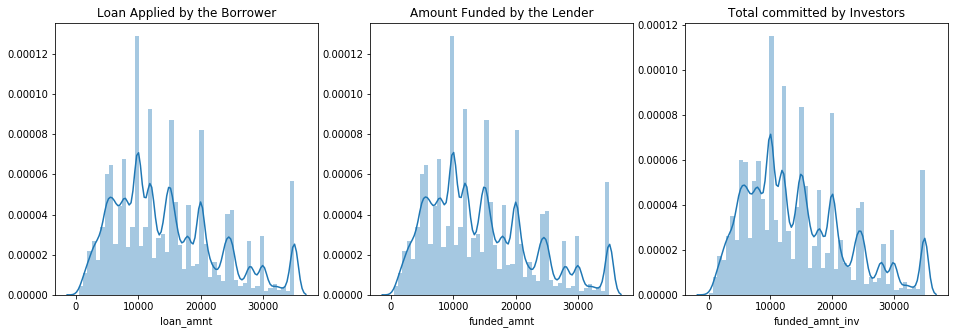

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(train['loan_amnt'], ax=ax[0])
sns.distplot(train['funded_amnt'], ax=ax[1])
sns.distplot(train['funded_amnt_inv'], ax=ax[2])
ax[1].set_title("Amount Funded by the Lender")
ax[0].set_title("Loan Applied by the Borrower")
ax[2].set_title("Total committed by Investors")


* Most of the loans issued were in the range of 10,000 to 20,000 USD.
* Loans were issued in an incremental manner. (Possible due to a recovery in the U.S economy)
* The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.


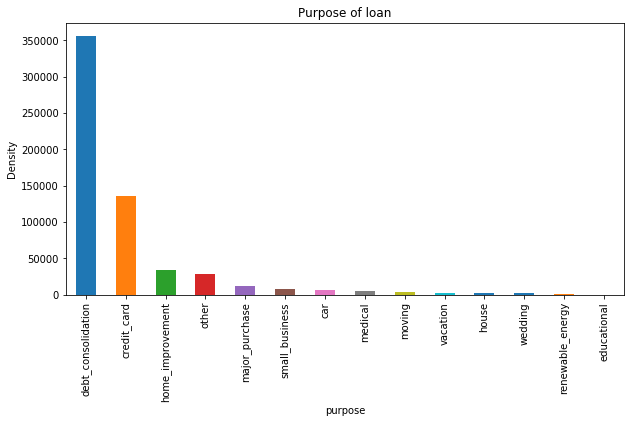

In [10]:
train.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))
plt.xlabel('purpose'); plt.ylabel('Density'); plt.title('Purpose of loan');

**Debt Consolidation** - more than 350K loans (~58%)  
**Credit Card**  — more than 130K (~20%)  
**Home Improvement** — more than 135K (~6%)  
**Other Purposes** — less than 30K (~4%)

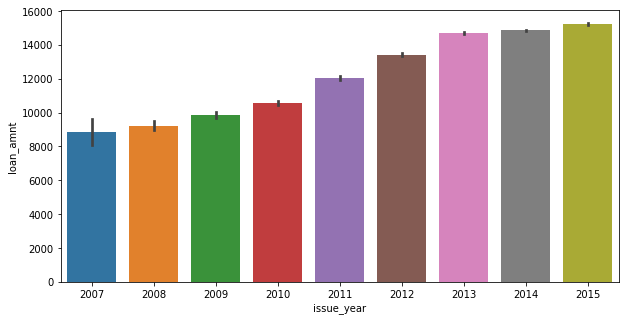

In [11]:
plt.figure(figsize=(10,5))
train['issue_year'] = train['issue_d'].dt.year
sns.barplot(x='issue_year',y='loan_amnt',data=train)

* The year of 2015 was the year were most loans were issued.

Text(0.5,1,'Yearwise Distribution of defaulter')

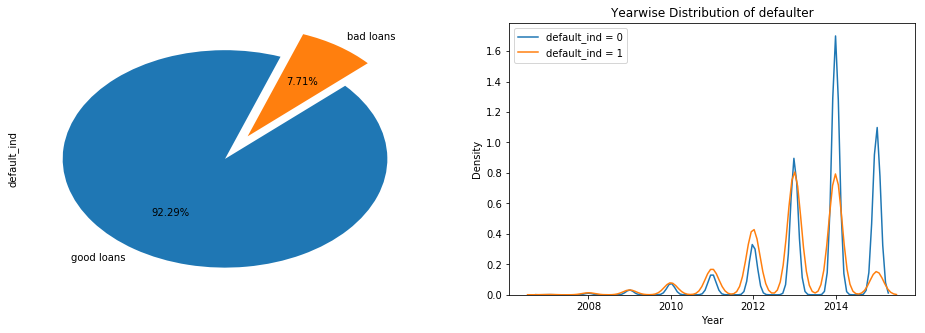

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
train['default_ind'].value_counts().plot.pie(explode=[0,0.25],labels=['good loans','bad loans'],
                                             autopct='%1.2f%%',startangle=70,ax=ax[0])
sns.kdeplot(train.loc[train['default_ind']==0,'issue_year'],label='default_ind = 0')
sns.kdeplot(train.loc[train['default_ind']==1,'issue_year'],label='default_ind = 1')
plt.xlabel('Year'); plt.ylabel('Density'); plt.title('Yearwise Distribution of defaulter')

* Most of the loan default is done in year 2013 and 2014

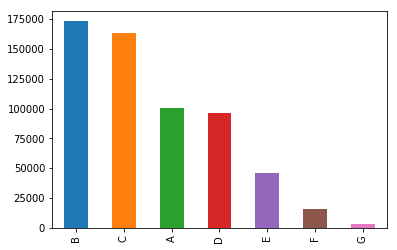

In [13]:
train.grade.value_counts().plot.bar()

* Most people have Grade **B**

(Text(0.5,1,'default_ind=0 vs grade'), Text(0.5,1,'default_ind=1 vs grade'))

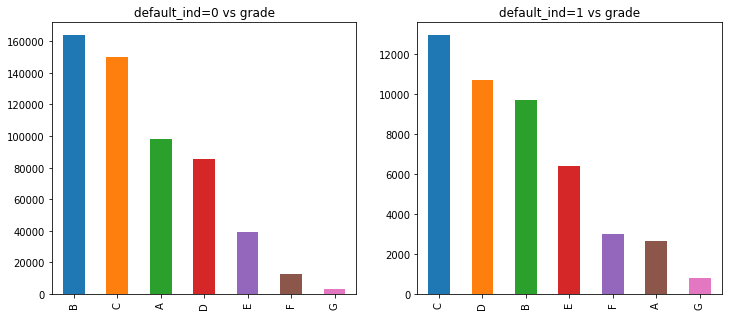

In [14]:
fig,array=plt.subplots(1,2,figsize=(12,5))
train.loc[train['default_ind']==0,'grade'].value_counts().plot.bar(ax=array[0])
train.loc[train['default_ind']==1,'grade'].value_counts().plot.bar(ax=array[1])
array[0].set_title('default_ind=0 vs grade'),array[1].set_title('default_ind=1 vs grade')

* Most people with Grade **C** have done the Default

In [15]:
#Converting Emp Length into Integer
train.emp_length.unique()
train.loc[train['emp_length']=='10+ years','emp_len'] = 10
train.loc[train['emp_length']=='<1 year','emp_len'] = .5
train.loc[train['emp_length']=='1 year','emp_len'] = 1
train.loc[train['emp_length']=='3 years','emp_len'] = 3
train.loc[train['emp_length']=='8 years','emp_len'] = 8
train.loc[train['emp_length']=='9 years','emp_len'] = 9
train.loc[train['emp_length']=='4 years','emp_len'] = 4
train.loc[train['emp_length']=='5 years','emp_len'] = 5
train.loc[train['emp_length']=='6 years','emp_len'] = 6
train.loc[train['emp_length']=='2 years','emp_len'] = 2
train.loc[train['emp_length']=='7 years','emp_len'] = 7
train.loc[train['emp_length']=='nan','emp_len'] = 0

In [16]:
print(train.int_rate.mean())
print(train.annual_inc.mean())


13.520910684598922
73972.8004821713


In [17]:
train['income_category'] = np.nan
train.loc[train['annual_inc'] <= 100000,'income_category'] = 'Low'
train.loc[(train['annual_inc'] > 100000) & (train['annual_inc'] <= 200000),'income_category'] = 'Medium'
train.loc[train['annual_inc'] > 200000,'income_category'] = 'High'

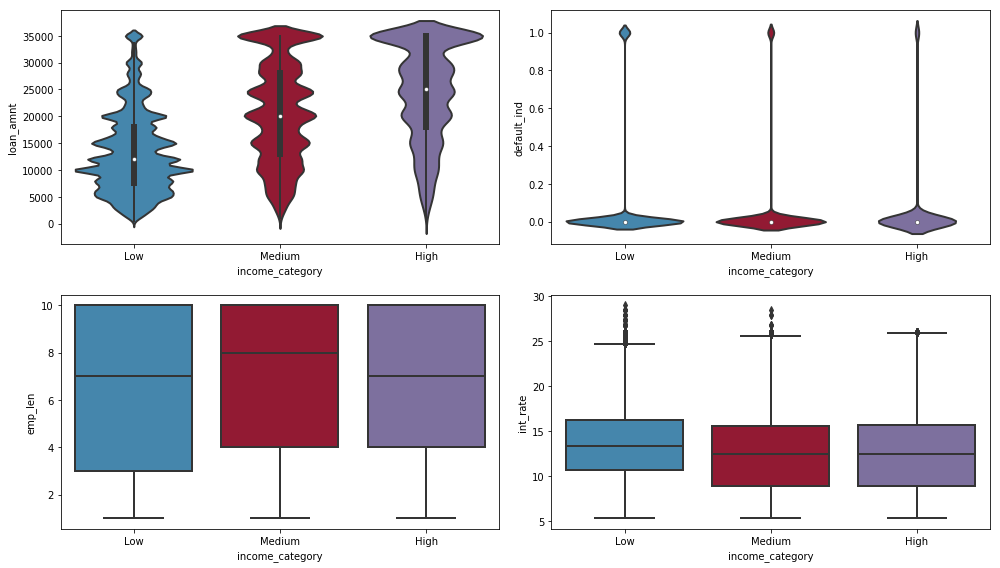

In [18]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,8))
plt.style.use('bmh')
sns.violinplot(x="income_category", y="loan_amnt", data=train, ax=ax1 )
sns.violinplot(x="income_category", y="default_ind", data=train, ax=ax2)
sns.boxplot(x="income_category", y="emp_len", data=train, ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=train, ax=ax4)
plt.tight_layout(h_pad=1.5)

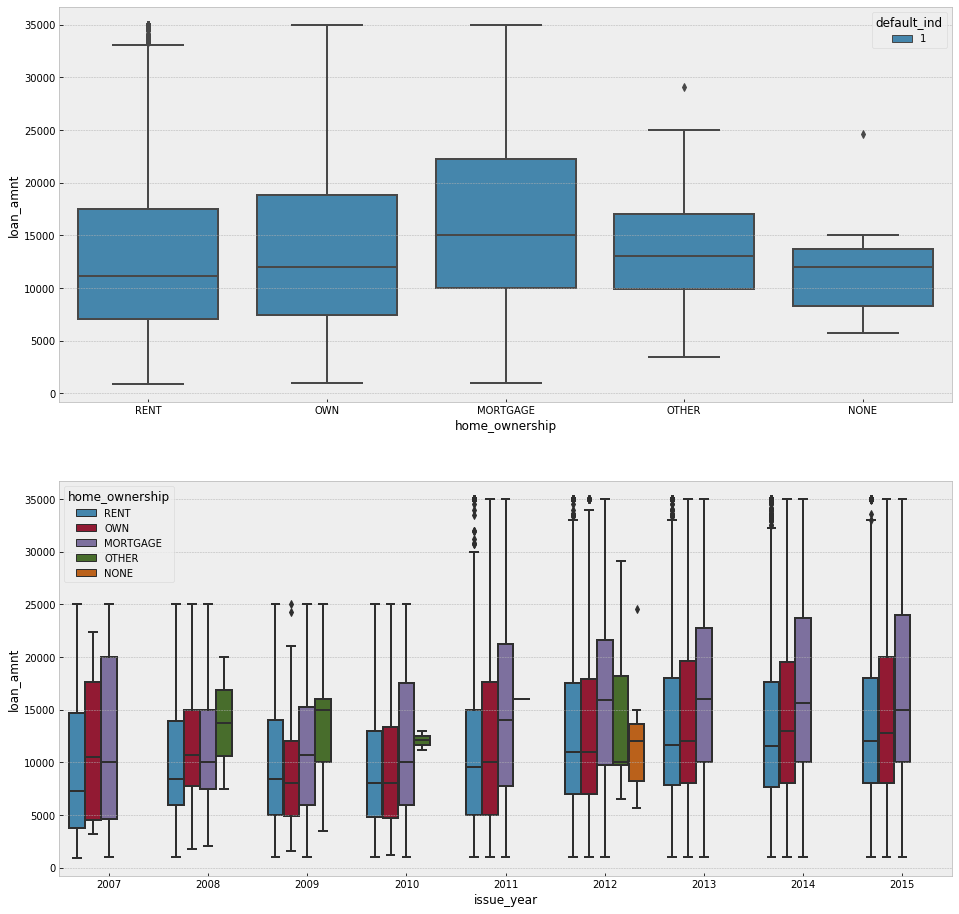

In [19]:
defaulter = train.loc[train['default_ind']==1]
plt.figure(figsize=(16,16))
plt.subplot(211)
sns.boxplot(data=defaulter,x = 'home_ownership',y='loan_amnt',hue='default_ind')
plt.subplot(212)
sns.boxplot(data=defaulter,x='issue_year',y='loan_amnt',hue='home_ownership')

In [20]:


def to_datepart(df,fldname,drop=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 
            'Is_year_end', 'Is_year_start']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64)
    if drop: df.drop(fldname, axis=1, inplace=True)

import re
to_datepart(train,'issue_d',drop=True)
to_datepart(test,'issue_d',drop=True)

def treat_missing(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            df.fillna(df[c].mode()[0],inplace=True)
        else:
            df.fillna(df[c].median(),inplace=True)



In [21]:
treat_missing(train)
treat_missing(test)

In [22]:
def train_cat(df):
    for n,c in df.items():
        if df[n].dtype == 'object': df[n] = c.astype('category').cat.as_ordered()

train_cat(train)
train_cat(test)



In [23]:
to_drop = ['sub_grade','emp_title','desc','title','zip_code',
           'addr_state','earliest_cr_line','last_pymnt_d','last_credit_pull_d']

train.drop(to_drop,axis=1,inplace=True)
test.drop(to_drop,axis=1,inplace=True)



In [24]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].dtype == 'object':
        if len(list(train[c].unique())) <= 2:
            train[c] = le.fit_transform(train[c])
            test[c] = le.transform(test[c])
            

In [25]:
print(train.shape)
print(test.shape)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(train.shape)
print(test.shape)

(598978, 78)
(256991, 75)
(598978, 123)
(256991, 118)


In [26]:
# train_label = train['default_ind']
# Align the training and testing data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

In [27]:
print(train.shape)
print(test.shape)

(598978, 111)
(256991, 111)


In [28]:
X = train.copy()
y = X.pop('default_ind')

def split_vals(a,n):return a[:n].copy(),a[n:].copy()

n_valid = len(test)  # same as test set size
n_trn = len(X)-n_valid
raw_train,raw_valid = split_vals(train,n_trn)
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape



((341987, 110), (341987,), (256991, 110))

In [34]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,n_estimators=100)
m.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
y_pred = m.predict(X_valid)
print(confusion_matrix(y_valid,y_pred))
print('Precision', precision_score(y_valid,y_pred))
print('Recall',recall_score(y_valid,y_pred))
print('AUC Score',roc_auc_score(y_valid,y_pred))

Confusion Matrix [[226885  18579]
 [   391  11136]]
Precision 0.37476022211004545
Recall 0.9660796391081808
AUC Score 0.9451951661629617


In [ ]:
y_test = test.pop('default_ind')
y_pred = m.predict(test)
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

### RECOMMENDATIONS AND CONCLUSION:
We have successfully built an machine learning algorithm to predict the people who might default on their loans. Also, we might want to look on other techniques or variables to improve the prediction power of the algorithm. One of the drawbacks is just the limited number of people who defaulted on their loan in the 8 years of data (2007-2015) present on the dataset. We can use an updated data frame which consist next 3 years values (2015-2018) and see how many of the current loans were paid off or defaulted or even charged off. Then these new data points can be used for predicting them or even used to train the model again to improve its accuracy  
Since the algorithm puts around 40% of non-defaulters in the default class, we might want to look further into this issue to make the model more robust.

### Business Insights and Recommendations:
The facts from our analysis shows that Applicants who has taken the Loan for 'small business' has the highest probability of charge off of 14%. Hence, bank should take extra caution like take some asset or guarantee while approving the loan for purpose of 'small business' Banks should consider "Grade" as a major variable while providing loans. Also, As the annual income is decreasing the probability that person will default is in-creasing with highest of 7% at (0 to 25000) salary bracket. The banks should either start with less principal loan amount and check the credibility. Finally, As the interest rate is increasing the probability that person will default with highest of 9% at 15% & above bracket. Banks should consider minimizing their interest range for Applicants who are self-employed & less than 1 year of experience as they are more probable of charged off.